In [1]:
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve

In [3]:
df=pd.read_csv(r"D:\Datatrained Project\dataset1-master\winequality-red.csv")#importing the csv file
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As there is no null values in the data so we dont have to impute values 

In [6]:
df.describe()#Summary of the data 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As there is not data whcih is to be filled so we don't have to use fill na method 

In [7]:
df.head()#First five data in the row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.tail()#Last five data of the row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


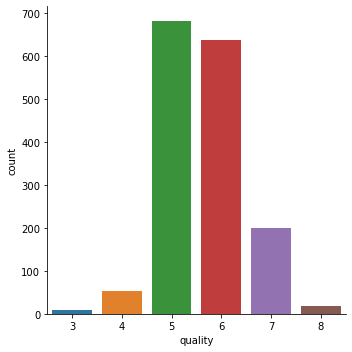

In [10]:
#For the correlation we have to use visualization using cat nplot
sns.catplot(x='quality',data=df,kind='count')

As in this we see that mostly wine lie between the quality of 5 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

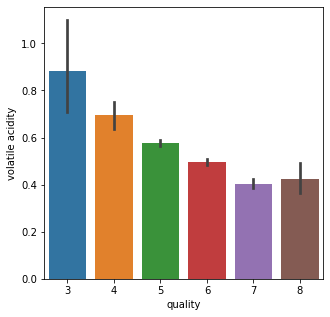

In [11]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',data=df,y='volatile acidity')

As the the quality of the acid which is volatile in nature is more in 3

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

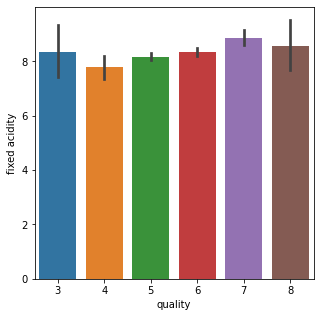

In [12]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',data=df,y='fixed acidity')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

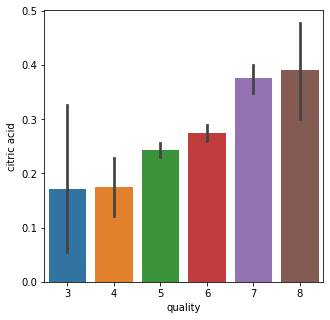

In [13]:
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',data=df,y='citric acid')

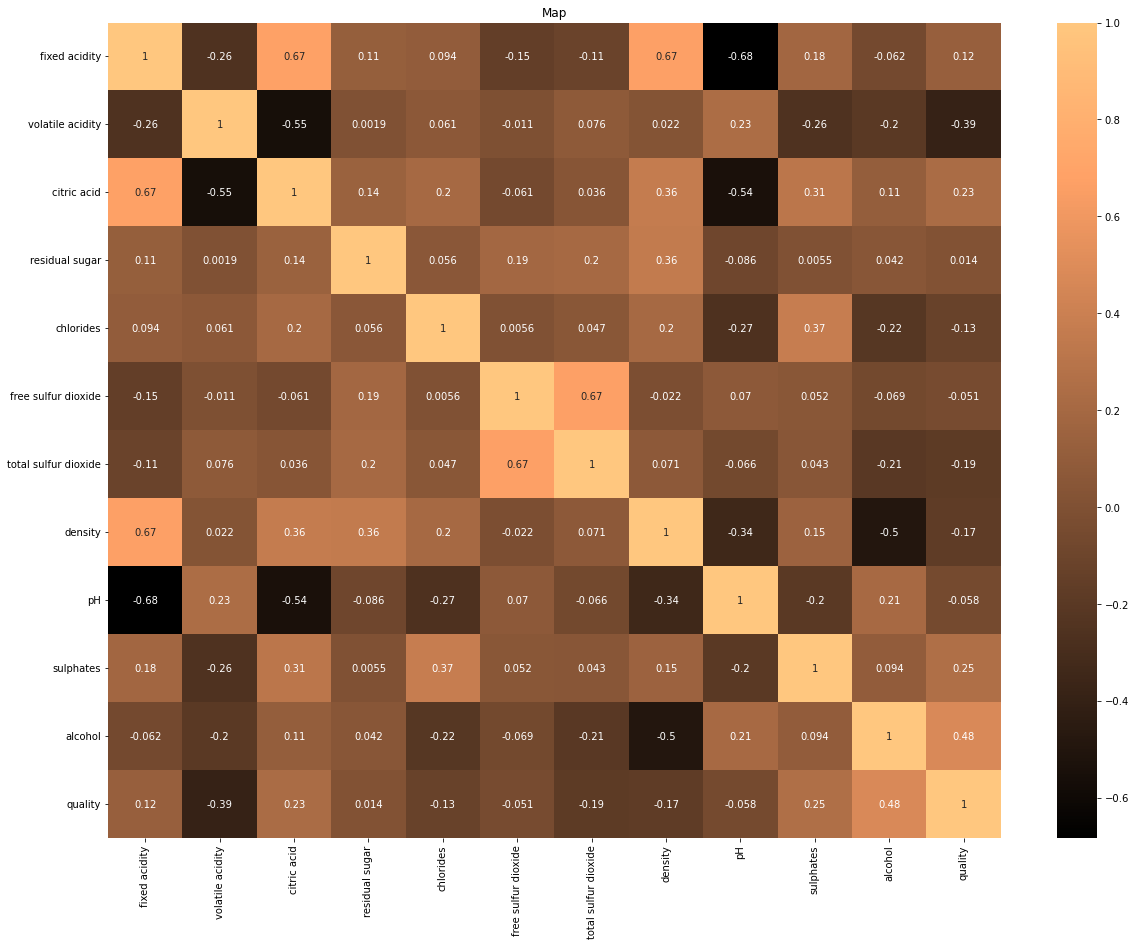

In [14]:
# Now we will see the coorelations between the data and the quality 
corr_matrix  =df.corr()
#size of the canvas 
plt.rcParams['figure.figsize'] = (20, 15)
#plor the correlation matrix
sns.heatmap(corr_matrix, cmap = 'copper', annot = True)
plt.title('Map')
plt.show()

In [15]:
#now we will take label out to take the data for pre processing
X = df.drop('quality',axis=1)

In [16]:
X
#the Label has been removed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
Y = df['quality'].apply(lambda y_value:'1' if y_value>=7 else '0')

In [18]:
#As we have divided the quality as good and as bad . we have set the value good as 7 or greater and less than 7 it is bad

In [19]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: object

In [20]:
#Spilting the data into train and test
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [21]:
Y.shape

(1599,)

In [22]:
Y_train.shape

(1279,)

In [23]:
Y_test.shape

(320,)

In [24]:
#Now Buliding a classification Model
#Random Forest Classifier

In [124]:
rf = RandomForestClassifier()

In [125]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [126]:
Prediction=rf.fit(X_test,Y_test)

In [127]:
Prediction

RandomForestClassifier()

In [128]:
X_test_Prediction=rf.predict(X_test)

In [129]:
test_data_accuracy=accuracy_score(X_test_Prediction,Y_test)

In [130]:
print('Accuracy:',test_data_accuracy)

Accuracy: 1.0


In [131]:
#Cross validation
scr = cross_val_score(Model1, X_train, Y_train, cv=5)
print("Cross validation score of Random forest model is",scr.mean())

Cross validation score of Random forest model is 0.9046323529411765


In [140]:
#Decision tree model
dt= DecisionTreeClassifier()

In [141]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [142]:
Prediction=dt.fit(X_test,Y_test)

In [143]:
Prediction

DecisionTreeClassifier()

In [144]:
X_test_Prediction=dt.predict(X_test)

In [145]:
test_data_accuracy=accuracy_score(X_test_Prediction,Y_test)

In [146]:
print('Accuracy:',test_data_accuracy)

Accuracy: 1.0


In [139]:
scr = cross_val_score(df, X_train, Y_train, cv=5)
print("Cross validation score of Decision Tree model is",scr.mean())

Cross validation score of Decision Tree model is 0.8514583333333334


In [147]:
#Linear Regression
lr=LinearRegression()

In [148]:
lr.fit(X_train,Y_train)

LinearRegression()

In [149]:
prediction=lr.fit(X_test,Y_test)

In [150]:
prediction

LinearRegression()

In [151]:
X_test_prediction=lr.predict(X_test)

In [152]:
test_data_accuracy=accuracy_score(X_test_Prediction,Y_test)

In [153]:
print('Accuracy:',test_data_accuracy)

Accuracy: 1.0


In [154]:
scr = cross_val_score(lr, X_train, Y_train, cv=5)
print("Cross validation score of Linear Regression is",scr.mean())

Cross validation score of Linear Regression is 0.21527121764434481


In [155]:
#Gradient Boositing
gbc=GradientBoostingClassifier()

In [156]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [157]:
prediction=gbc.fit(X_test,Y_test)

In [158]:
prediction

GradientBoostingClassifier()

In [159]:
X_test_prediction=gbc.predict(X_test)

In [160]:
test_data_accuracy=accuracy_score(X_test_Prediction,Y_test)

In [161]:
print('Accuracy:',test_data_accuracy)

Accuracy: 1.0


In [162]:
scr = cross_val_score(gbc, X_train, Y_train, cv=5)
print("Cross validation score of Gradient Booster is",scr.mean())

Cross validation score of Gradient Booster is 0.8944546568627452


In [163]:
#Knn Model
knn=KNeighborsClassifier()

In [164]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [165]:
prediction=knn.fit(X_test,Y_test)

In [166]:
prediction

KNeighborsClassifier()

In [167]:
X_test_prdiction=knn.predict(X_test)

In [168]:
test_data_accuracy=accuracy_score(X_test_Prediction,Y_test)

In [169]:
print('Accuracy:',test_data_accuracy)

Accuracy: 1.0


In [170]:
scr = cross_val_score(knn, X_train, Y_train, cv=5)
print("Cross validation score of KNN is",scr.mean())

Cross validation score of KNN is 0.8483333333333334


C:\Users\anshul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anshul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\anshul\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be re

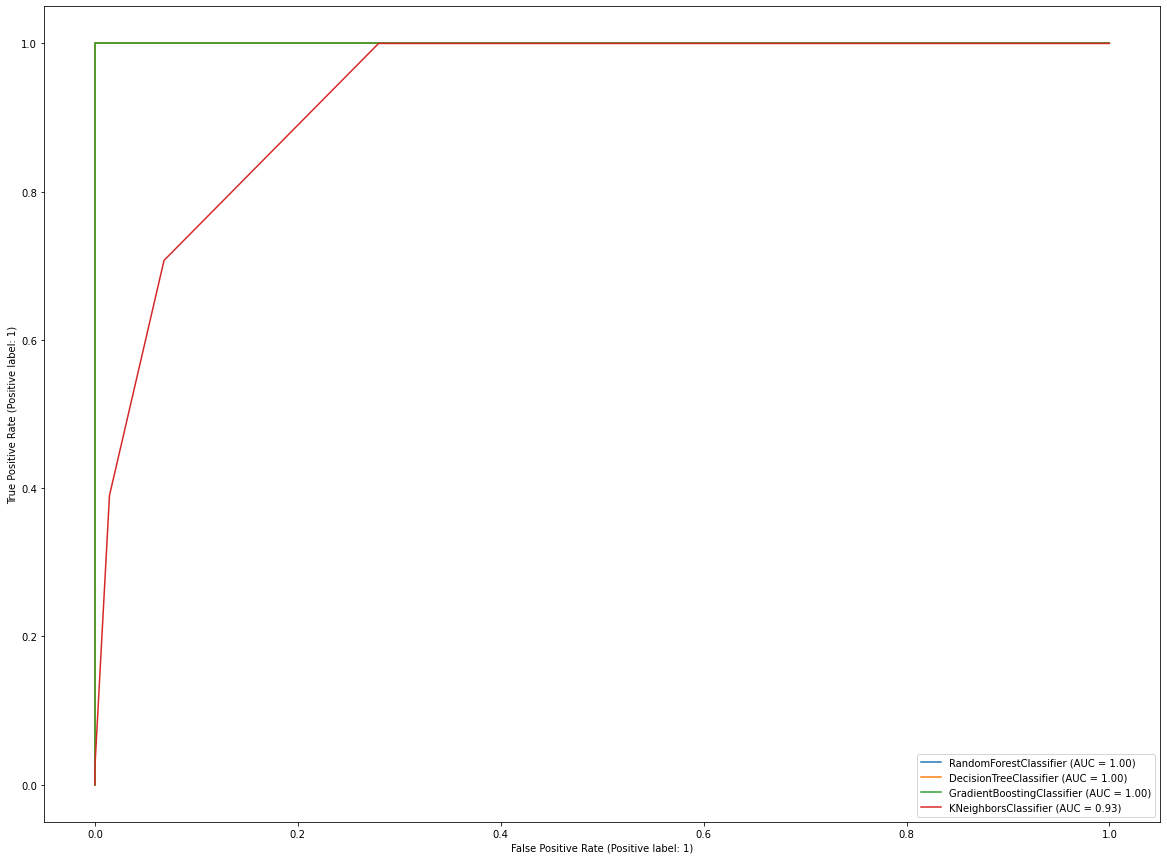

In [174]:
# Making ROC Auc Curve
disp = plot_roc_curve(rf, X_test, Y_test)

plot_roc_curve(dt,X_test, Y_test, ax=disp.ax_)

plot_roc_curve(gbc, X_test, Y_test, ax=disp.ax_)

plot_roc_curve(knn, X_test, Y_test, ax=disp.ax_)

plt.show()

In [175]:
#Hypertuning
from sklearn.model_selection import GridSearchCV

#creating parameter list to pass in Gridsearchcv
parameter ={'learning_rate': np.arange(0.2,0.5,0.2),
           'max_depth':range(4,8),
            'min_samples_split':range(2,6)
           }

In [179]:
GCV = GridSearchCV(gbc,parameter,cv=5,scoring='accuracy')

GCV.fit(X_train,Y_train)  #fitting the data in model
GCV.best_params_          #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(X_test)    #predicting with best parameter 
accuracy_score(Y_test, GCV_pred)                  #checking final accuracy

0.925

In [187]:
# A predictive system
input_data=(7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5) #We are removing the label 

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction=rf.predict(input_data_reshaped)
print(prediction)

['0']


C:\Users\anshul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [188]:
if (prediction[0]==1):
    print("Good Wine")
else:
    print("Bad Wine")

Bad Wine
